In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#Load Prices forTop 5 Companies
nasdaq = pd.read_excel('listings.xlsx', sheet_name = 'nasdaq',na_values='n/a')
nasdaq.set_index('Stock Symbol', inplace= True)
top_5 = nasdaq['Market Capitalization'].nlargest(n=5)
top_5.div(1000000) #market Cap in million USD

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Stock Symbol
AAPL     740024.467000
GOOGL    580917.530339
GOOG     569426.124504
MSFT     501903.061809
AMZN     422138.530626
Name: Market Capitalization, dtype: float64

In [23]:
tickers = top_5.index.tolist() #convert index to list
tickers

['AAPL', 'GOOGL', 'GOOG', 'MSFT', 'AMZN']

In [24]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import yfinance as yf
from pandas_datareader import data as wb
yf.pdr_override()

In [27]:
df = wb.DataReader(tickers,start='2020-1-1')
df.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                   Close  \
                 AAPL       AMZN       GOOG      GOOGL        MSFT       AAPL   
Date                                                                            
2020-01-02  73.449394  94.900497  68.368500  68.433998  156.151978  75.087502   
2020-01-03  72.735313  93.748497  68.032997  68.075996  154.207565  74.357498   
2020-01-06  73.314888  95.143997  69.710503  69.890503  154.606171  74.949997   
2020-01-07  72.970078  95.343002  69.667000  69.755501  153.196518  74.597504   
2020-01-08  74.143906  94.598503  70.216003  70.251999  155.636703  75.797501   

                                                         ...       Open  \
                 AMZN       GOOG      GOOGL        MSFT  ...       AAPL   
Date                                                     ...              
2020-01-02  94.900497  68.368500  68.433998  160.619995  ...  74.059998   
2020-01-03  93.748497  68.032997  68.075996  158.619995  ...  74.287498   
2020-01-06  95.143997  69.710503  69.890503  159.029999  ...  73.447502   
2020-01-07  95.343002  69.667000  69.755501  157.580002  ...  74.959999   
2020-01-08  94.598503  70.216003  70.251999  160.089996  ...  74.290001   

                                                            Volume            \
                 AMZN       GOOG      GOOGL        MSFT       AAPL      AMZN   
Date                                                                           
2020-01-02  93.750000  67.077499  67.420502  158.779999  135480400  80580000   
2020-01-03  93.224998  67.392998  67.400002  158.320007  146322800  75288000   
2020-01-06  93.000000  67.500000  67.581497  157.080002  118387200  81236000   
2020-01-07  95.224998  69.897003  70.023003  159.320007  108872000  80898000   
2020-01-08  94.902000  69.603996  69.740997  158.929993  132079200  70160000   

                                          
                GOOG     GOOGL      MSFT  
Date                                      
2020-01-02  28132000  27278000  22622100  
2020-01-03  23728000  23408000  21116200  
2020-01-06  34646000  46768000  20813700  
2020-01-07  30054000  34330000  21634100  
2020-01-08  30560000  35314000  27746500  

[5 rows x 30 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 784 entries, 2020-01-02 to 2023-02-10
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   784 non-null    float64
 1   (Adj Close, AMZN)   784 non-null    float64
 2   (Adj Close, GOOG)   784 non-null    float64
 3   (Adj Close, GOOGL)  784 non-null    float64
 4   (Adj Close, MSFT)   784 non-null    float64
 5   (Close, AAPL)       784 non-null    float64
 6   (Close, AMZN)       784 non-null    float64
 7   (Close, GOOG)       784 non-null    float64
 8   (Close, GOOGL)      784 non-null    float64
 9   (Close, MSFT)       784 non-null    float64
 10  (High, AAPL)        784 non-null    float64
 11  (High, AMZN)        784 non-null    float64
 12  (High, GOOG)        784 non-null    float64
 13  (High, GOOGL)       784 non-null    float64
 14  (High, MSFT)        784 non-null    float64
 15  (Low, AAPL)         784 non-null    fl

In [29]:
df.stack()

Adj Close       Close        High         Low        Open  \
Date                                                                           
2020-01-02 AAPL    73.449394   75.087502   75.150002   73.797501   74.059998   
           AMZN    94.900497   94.900497   94.900497   93.207497   93.750000   
           GOOG    68.368500   68.368500   68.406998   67.077499   67.077499   
           GOOGL   68.433998   68.433998   68.433998   67.324501   67.420502   
           MSFT   156.151978  160.619995  160.729996  158.330002  158.779999   
...                      ...         ...         ...         ...         ...   
2023-02-10 AAPL   151.009995  151.009995  151.339996  149.220001  149.460007   
           AMZN    97.610001   97.610001   98.820000   96.230003   97.559998   
           GOOG    94.860001   94.860001   97.019997   94.529999   95.739998   
           GOOGL   94.570000   94.570000   96.750000   94.250000   95.449997   
           MSFT   263.100006  263.100006  264.089996  260.660004  261.529999   

                     Volume  
Date                         
2020-01-02 AAPL   135480400  
           AMZN    80580000  
           GOOG    28132000  
           GOOGL   27278000  
           MSFT    22622100  
...                     ...  
2023-02-10 AAPL    57409100  
           AMZN    52698600  
           GOOG    49269900  
           GOOGL   54927500  
           MSFT    25760900  

[3920 rows x 6 columns]

In [30]:
#Resahpe your Data:.unstak()
unstacked = df['Close'].unstack()


In [31]:
unstacked.head()

      Date      
AAPL  2020-01-02    75.087502
      2020-01-03    74.357498
      2020-01-06    74.949997
      2020-01-07    74.597504
      2020-01-08    75.797501
dtype: float64

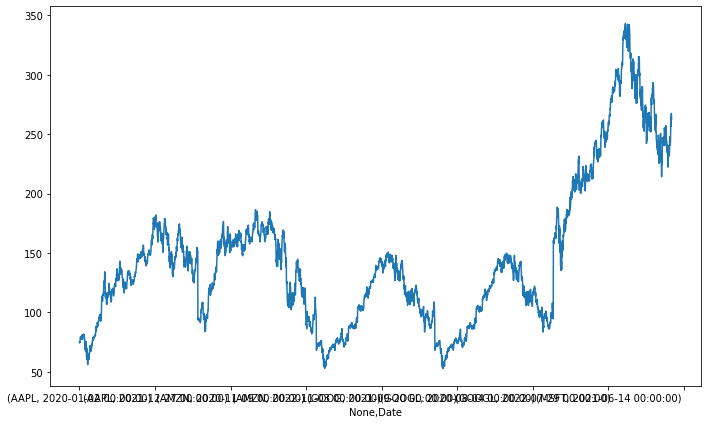

In [32]:
#Stock Price:Visualization
unstacked.plot(subplots=True,figsize=(10,6))
plt.tight_layout(); plt.show()